In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
global_temp = pd.read_csv("GlobalTemperatures.csv")

In [3]:
global_temp['Year'] =pd.to_datetime(global_temp['dt']).dt.year 

In [4]:
Uncertainty = global_temp.groupby('Year')['LandAverageTemperatureUncertainty'].mean().reset_index()

# Plotting the Temperature Uncertainties over time

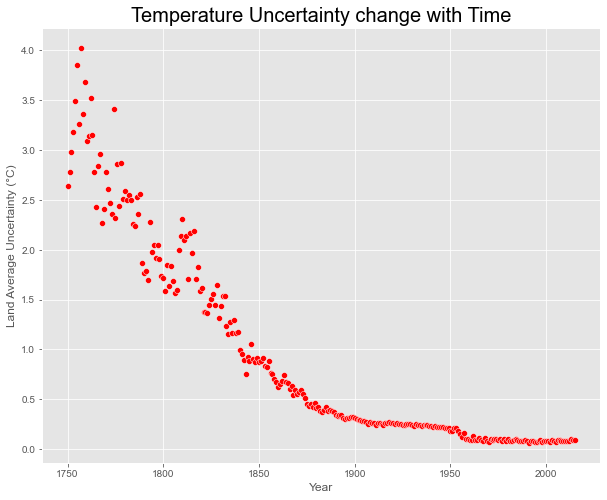

In [5]:
plt.style.use("ggplot")
fig,ax=plt.subplots(figsize=(10,8))
sns.set(style="whitegrid")
sns.scatterplot(x=Uncertainty['Year'],y=Uncertainty['LandAverageTemperatureUncertainty'],data=Uncertainty,color='red')
ax.set_ylabel('Land Average Uncertainty (°C)')
ax.set_title('Temperature Uncertainty change with Time',size=20);
plt.savefig('Uncertainty.png', bbox_inches='tight')

# Plotting the data as boxplots indicating the mean/median changes for before and after 1970

In [6]:
#updating a new field "Period" using the loc function
global_temp.loc[global_temp['Year']<1970,'Period']  = 'Before 1970'
global_temp.loc[global_temp['Year']>1970,'Period']  = 'After 1970'

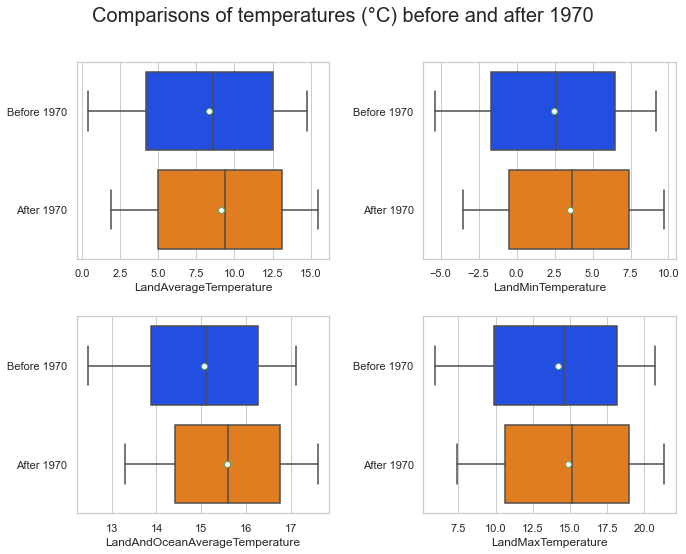

In [7]:
global_temp=global_temp.dropna()
#plotting multiple plots
fig,ax=plt.subplots(2,2,figsize=(10,8))

sns.set_style("whitegrid")

sns.boxplot(ax=ax[0, 0],x="LandAverageTemperature",y="Period", data=global_temp,
            showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"},palette='bright')

sns.boxplot(ax=ax[1, 1],x="LandMaxTemperature",y="Period", data=global_temp,
            showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"},palette='bright')

sns.boxplot(ax=ax[0, 1],x="LandMinTemperature",y="Period", data=global_temp,
            showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"},palette='bright')

sns.boxplot(ax=ax[1, 0],x="LandAndOceanAverageTemperature",y="Period", data=global_temp
            ,showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"},palette='bright')

fig.suptitle('Comparisons of temperatures (°C) before and after 1970',size=20);
ax[1, 0].set(ylabel=None);
ax[0, 0].set(ylabel=None);
ax[1, 1].set(ylabel=None);
ax[0, 1].set(ylabel=None);
fig.tight_layout(pad=2.0)
plt.savefig('tempBox.png', bbox_inches='tight')

# Looking at the global CO2 emissions to get an idea what might be driving this temperature  increase

In [8]:
EmissionsData = pd.read_csv("emission_data.csv")

In [9]:
col_list = EmissionsData.keys()[2:]
i = 0

for col in col_list:
    df = EmissionsData[['Country',col]]
    df = df.rename(columns = {col:"Emission_Levels"})
    df['Year'] = str(col)
    if i==0:
        df_corrected = df
    else:
        df_corrected= pd.concat([df_corrected,df],ignore_index=True,sort=True)
    i+=1

In [10]:
WorldCo2_Levels = df_corrected[df_corrected['Country']=='World']

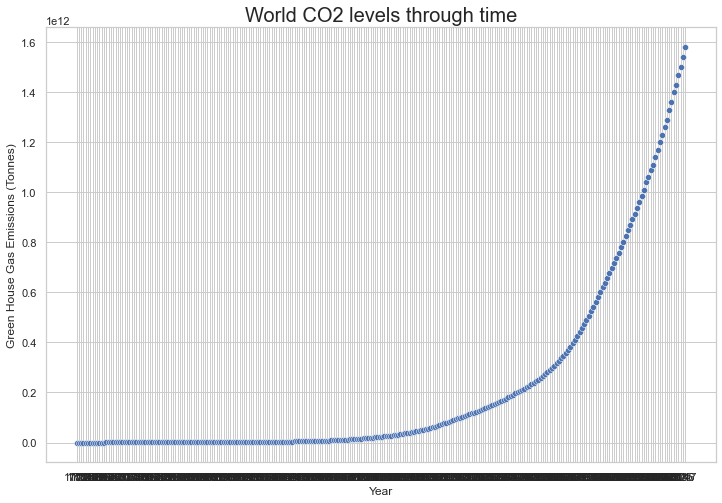

In [11]:
fig,ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x=WorldCo2_Levels['Year'],y=WorldCo2_Levels['Emission_Levels'],data=WorldCo2_Levels)


ax.set_title('World CO2 levels through time',size=20);

ax.set_ylabel('Green House Gas Emissions (Tonnes)');